In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

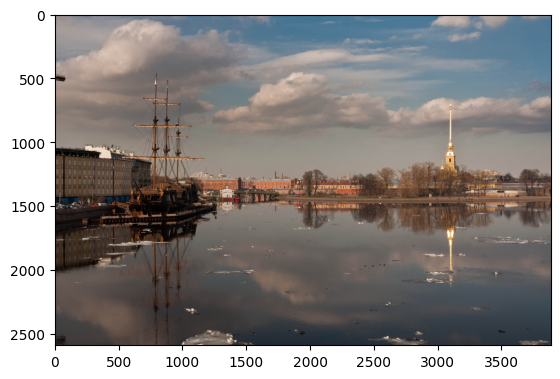

In [24]:
left = cv2.cvtColor(cv2.imread("boat1.jpg") , cv2.COLOR_BGR2RGB)
plt.imshow(left)

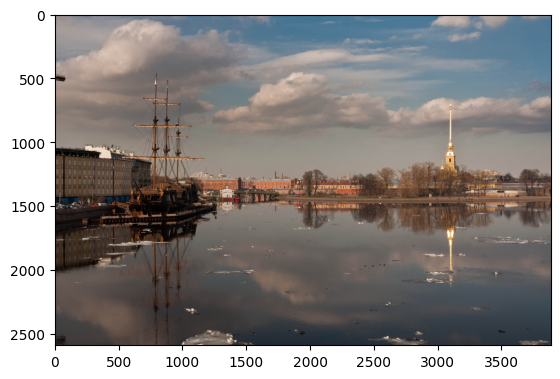

In [25]:
right = cv2.cvtColor(cv2.imread("boat1.jpg") , cv2.COLOR_BGR2RGB)
plt.imshow(right)

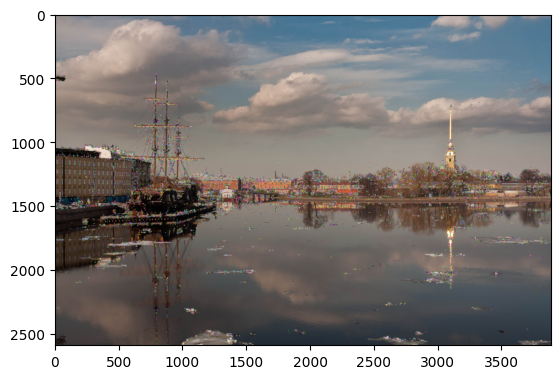

In [26]:
sift = cv2.SIFT_create()
kp1 , des1 = sift.detectAndCompute(left , None)
kp2 , des2 = sift.detectAndCompute(right , None)
left_kp = cv2.drawKeypoints(left , kp1 , 0)
plt.imshow(left_kp)

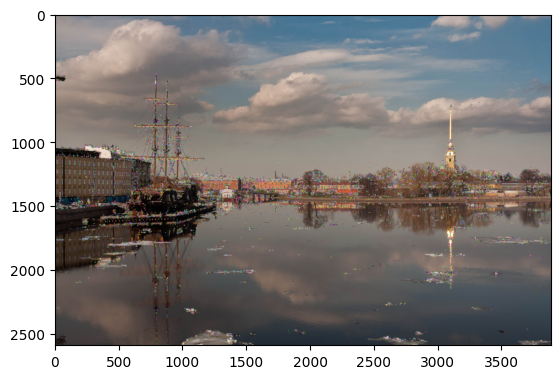

In [27]:
right_kp = cv2.drawKeypoints(right , kp2 , 0)
plt.imshow(left_kp)

In [28]:
des1.shape

(18992, 128)

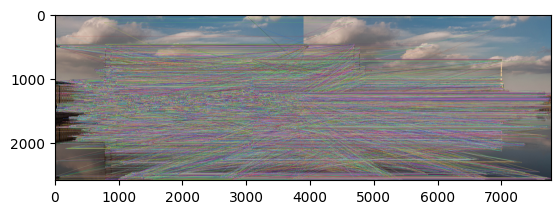

In [29]:
Matcher = cv2.BFMatcher()
rawMatches = Matcher.knnMatch(des1 , des2 , k = 2)
plt.imshow(cv2.drawMatchesKnn(left , kp1 , right , kp2 , rawMatches , 0))

Lowes ratio test

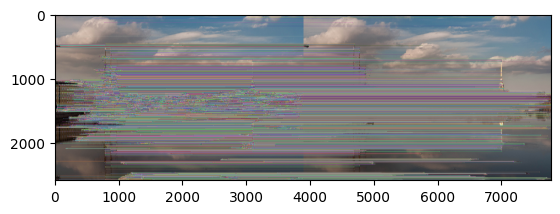

In [30]:
goodKeyMatches = []
goodKeyPointIndex = []
for m , n in rawMatches:
    if(m.distance < 0.85 * n.distance): # m and n are the two closest points from descriptor 1 and descriptor 2 of the images
        goodKeyMatches.append([m]) # getting the good descritor matches into the 
        goodKeyPointIndex.append((m.trainIdx , m.queryIdx)) # m.trainIdx refers to the keypoint index for left img and viseversa for query_idx 
# print(type(rawMatches))
img1_kp = np.array([kp1[i].pt for (_ , i) in goodKeyPointIndex]) # stores all the good keypoints of kp1 
img2_kp = np.array([kp2[i].pt for (i, _) in goodKeyPointIndex]) # stores all the good keypoints of kp2
plt.imshow(cv2.drawMatchesKnn(left , kp1 , right , kp2 , goodKeyMatches , 0)) # displaying the good key points

image registration

In [31]:
H , status = cv2.findHomography(np.float32(img2_kp ), np.float32(img1_kp) , cv2.RANSAC , 5.0)
H

array([[ 1.00000000e+00,  1.41373989e-14, -6.42590355e-12],
       [-1.01931792e-14,  1.00000000e+00, -7.52371961e-12],
       [-6.69234485e-18,  8.89562691e-18,  1.00000000e+00]])

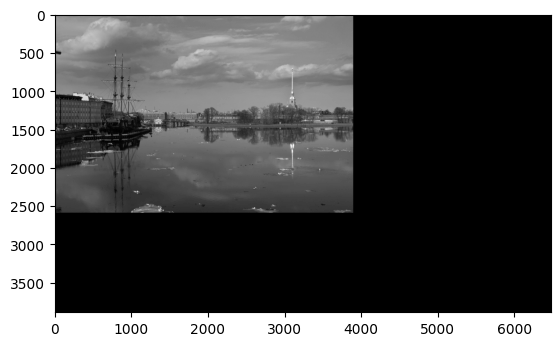

In [32]:
RightPanorama = cv2.warpPerspective(right.copy() , H , (left.shape[0] + right.shape[1] , left.shape[1]))
RightPanorama = cv2.cvtColor(RightPanorama , cv2.COLOR_BGR2GRAY)
cv2.imwrite("res.png" , RightPanorama)
plt.imshow(RightPanorama , cmap='gray')

In [35]:
LeftPanorama = np.zeros([RightPanorama.shape[0]  , RightPanorama.shape[1]])
left = cv2.cvtColor(left , cv2.COLOR_RGB2GRAY)
LeftPanorama[:left.shape[0] , :left.shape[1]] = left
plt.imshow(LeftPanorama , cmap='gray')

error: OpenCV(4.7.0) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<1>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


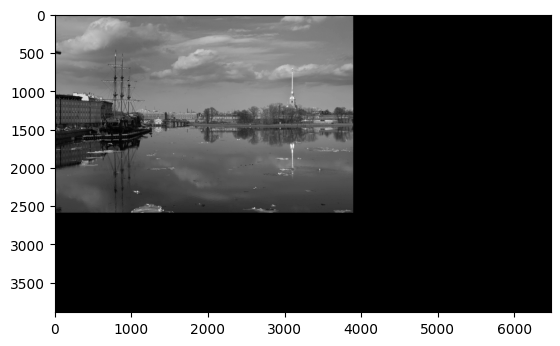

In [34]:
res = LeftPanorama + RightPanorama 
plt.imshow(res , cmap='gray')